In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2023-01-02 11:01:43.992021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2023-01-02 11:01:43.992062: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [3]:
path = "./15VS15strong/scd.h5"
scd_stats=["SCD"]

In [4]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [5]:
df = average_over_targets(df, "SCD")

In [6]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,39.78125,31.703125,45.03125,45.84375,43.46875,42.00000,1,"chr2,chr2","48886271,48886271",0,"53.6875,53.6875",>>,90,"48886252,48886252","-,-",41.31250
1,46.18750,43.062500,46.09375,45.18750,47.15625,43.96875,1,"chr2,chr12","48886271,35192378",0,"53.6875,53.65625",>>,90,"48886252,35192359","-,-",45.25000
2,44.68750,40.062500,45.46875,45.12500,45.90625,43.28125,1,"chr2,chr8","48886271,102781131",0,"53.6875,53.5",>>,90,"48886252,102781112","-,-",44.09375
3,54.93750,58.031250,56.37500,53.31250,57.96875,50.59375,1,"chr2,chr5","48886271,49962010",0,"53.6875,53.3125",>>,90,"48886252,49961991","-,-",55.21875
4,46.50000,44.906250,47.46875,45.87500,48.59375,44.78125,1,"chr2,chr9","48886271,26776375",0,"53.6875,53.125",>>,90,"48886252,26776356","-,-",46.37500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,87.00000,103.687500,100.12500,94.81250,99.31250,80.50000,3,"chr13,chr11","19698921,57467973",30,"51.9375,52.375",>>,60,"19698902,57467954","+,-",94.25000
20921,88.06250,105.500000,106.25000,100.43750,103.31250,83.50000,3,"chr13,chr4","19698921,70621553",30,"51.9375,52.28125",>>,60,"19698902,70621534","+,-",97.81250
20922,83.18750,98.937500,95.06250,89.81250,94.68750,76.75000,3,"chr13,chr2","19698921,101905971",30,"51.9375,52.25",>>,60,"19698902,101905952","+,+",89.75000
20923,89.31250,106.812500,106.25000,100.62500,103.93750,84.12500,3,"chr13,chr16","19698921,13117421",30,"51.9375,51.9375",>>,60,"19698902,13117402","+,+",98.50000


In [7]:
all_starts = list(df.start.unique())

In [16]:
# all_starts

In [9]:
all_cores_starts = {"motif 0" : 48886252, 
             "motif 1" : 35192359, 
             "motif 2" : 102781112,
             "motif 3" : 49961991,
            "motif 4" : 26776356,
            "motif 5" : 51152589,
            "motif 6" : 58566264,
            "motif 7" : 40837731,
            "motif 8" : 101261721,
            "motif 9" : 36523116,
            "motif 10" : 57467954,
            "motif 11" : 70621534,
            "motif 12" : 101905952,
            "motif 13" : 13117402,
            "motif 14" : 19698902}

In [11]:
df_grouped = df.groupby(["start", "flank_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [14]:
x = [x for x in range(31)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

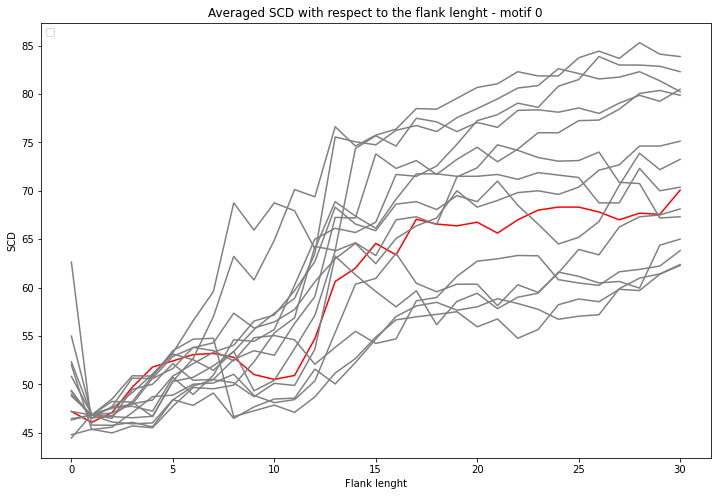

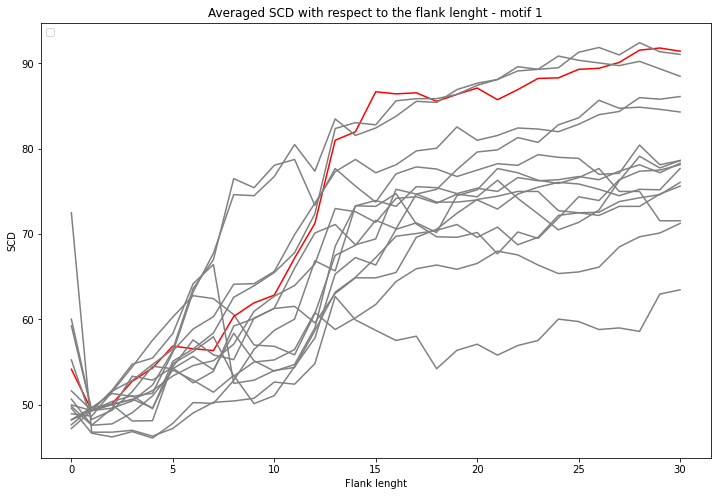

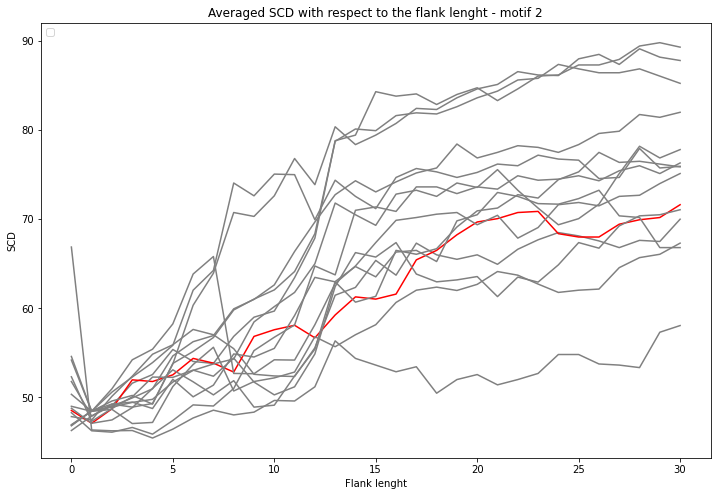

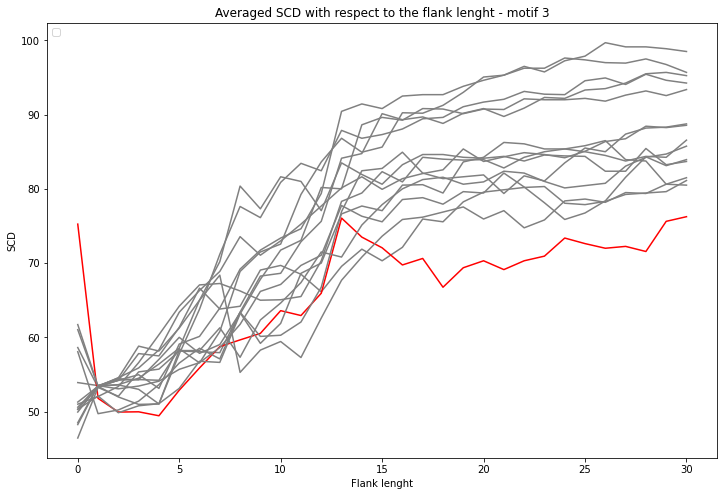

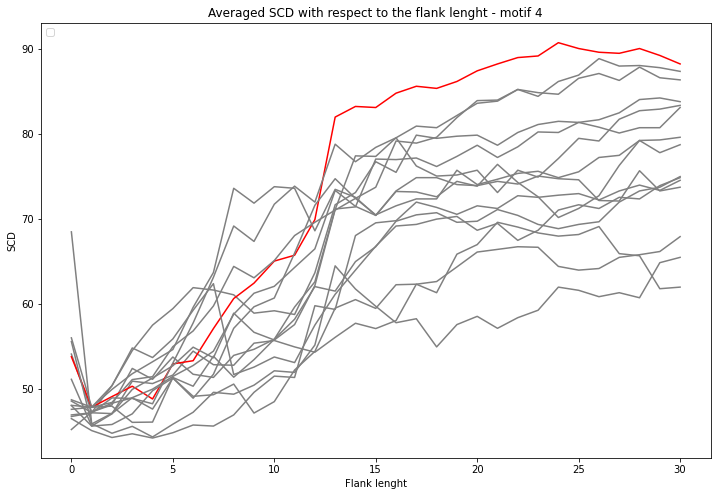

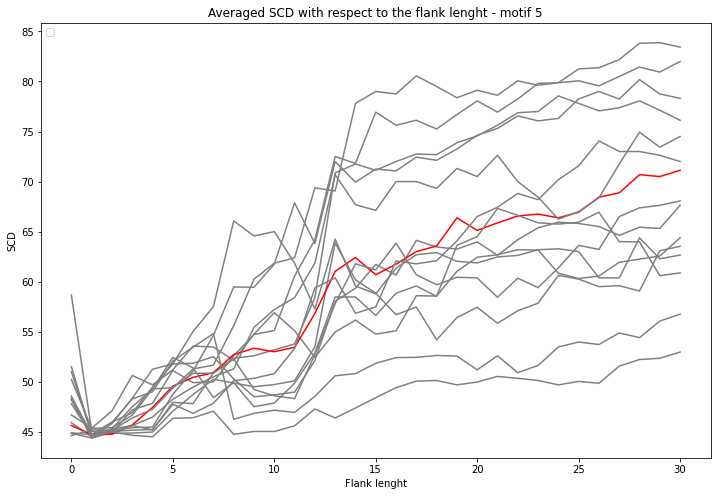

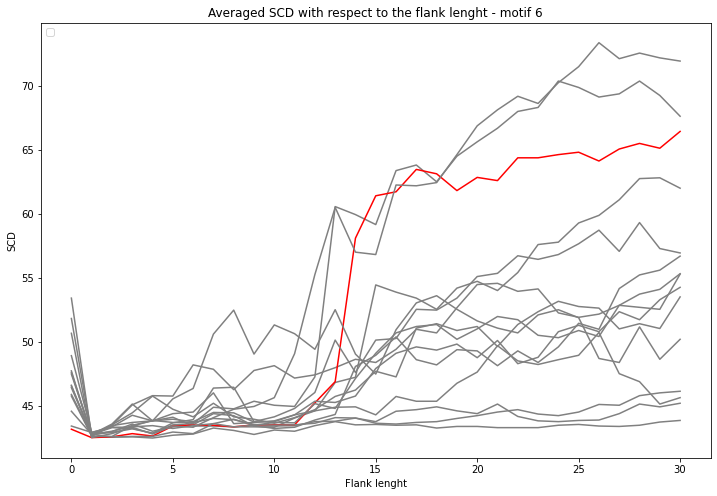

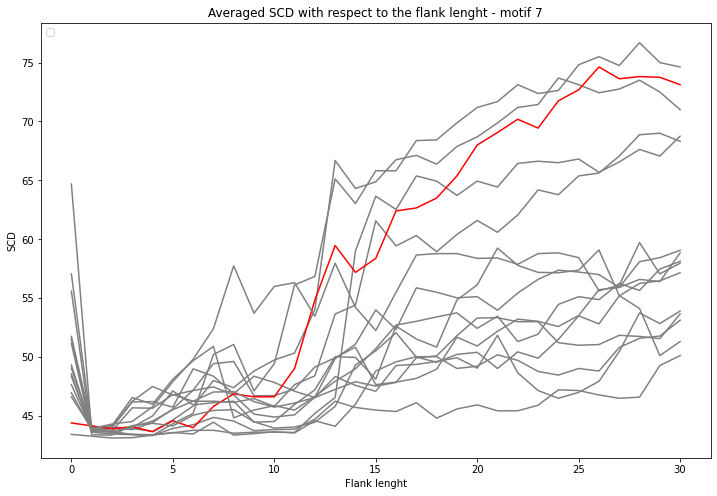

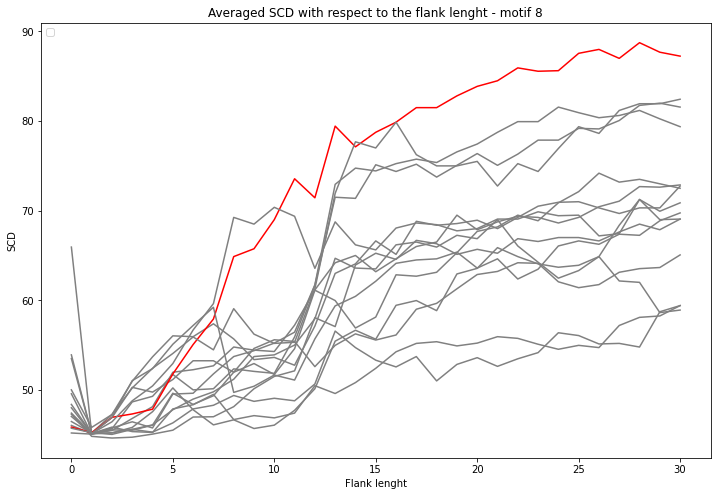

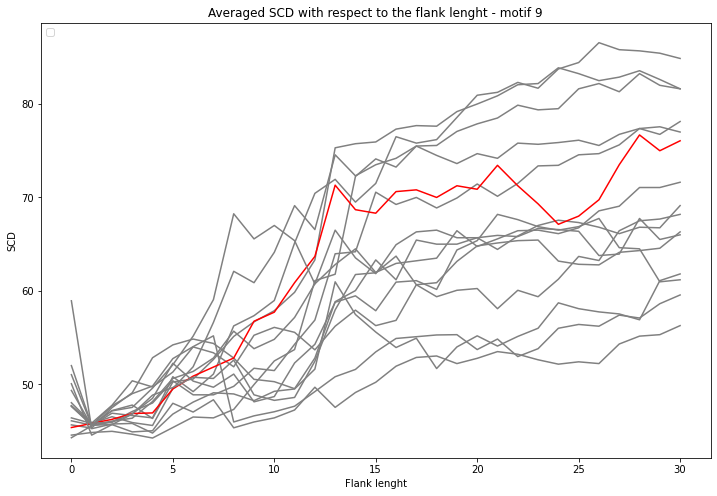

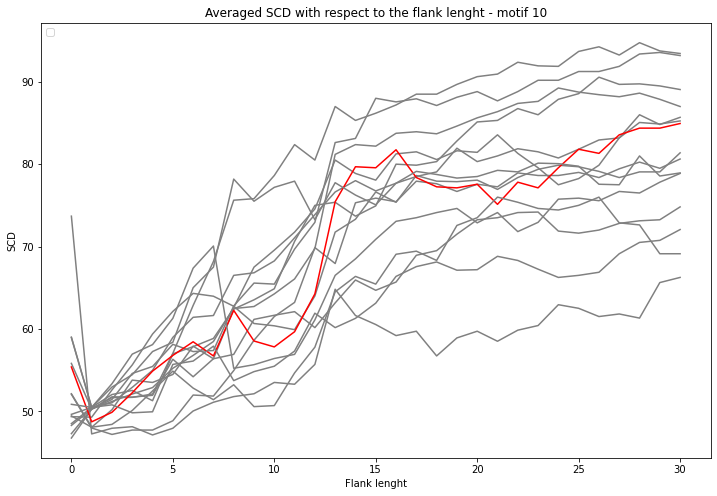

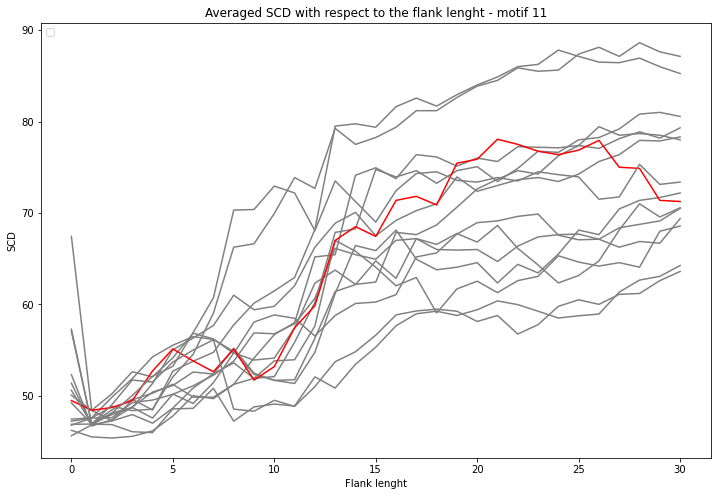

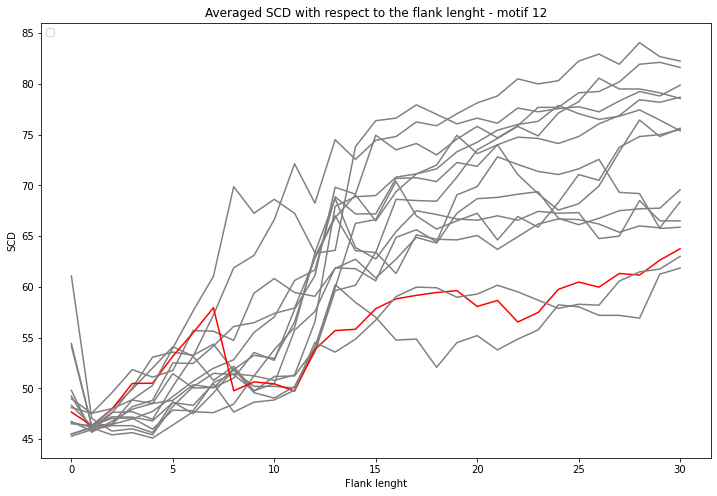

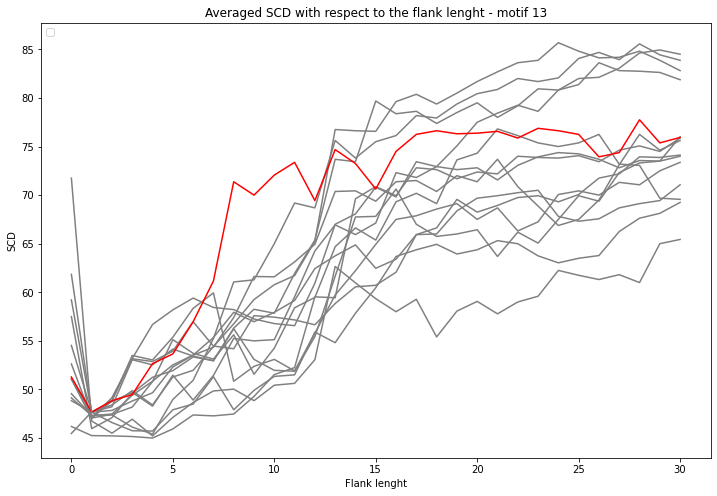

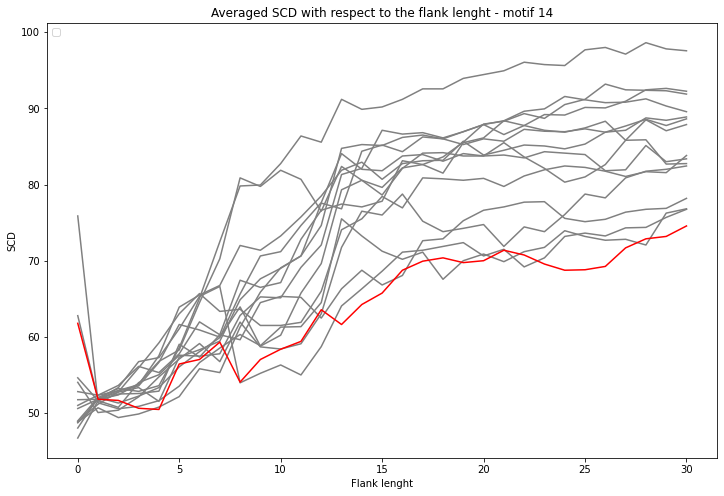

In [19]:
for key in all_cores_starts:
    
    plt.figure(figsize=(12,8))
    
    for start in all_starts:

        core_start, flank_start = split_concat_to_integers(start)

        if core_start == all_cores_starts[key]:
            if flank_start == all_cores_starts[key]:
                plt.plot(x, df_grouped[df_grouped["start"] == start]["SCD_average"], color="red")
            else:
                plt.plot(x, df_grouped[df_grouped["start"] == start]["SCD_average"], color="grey")
                
    plt.title("Averaged SCD with respect to the flank lenght - " + key)
    plt.xlabel("Flank lenght")
    plt.ylabel("SCD")
    plt.legend(loc="upper left")